<a href="https://colab.research.google.com/github/ronggobp/Machine-Learning-Course-2026/blob/main/notebooks/week-02-eda/02_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup & Integrasi W&B

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

# 1. Inisialisasi W&B untuk sesi EDA
run = wandb.init(project="titanic-eda-2026", name="cleaning-and-exploration")

# 2. Load Data dari URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Log dataset mentah ke W&B Table
raw_table = wandb.Table(dataframe=df)
wandb.log({"raw_data": raw_table})

print("Dataset berhasil dimuat!")
df.info()

Dataset berhasil dimuat!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cleaning Data (Handling Missing Values)

In [3]:
# Cek data yang hilang
print(df.isnull().sum())

# A. Imputasi Age dengan Median
df['Age'] = df['Age'].fillna(df['Age'].median())

# B. Imputasi Embarked dengan Modus
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# C. Drop Cabin (karena terlalu banyak missing value)
df.drop(columns=['Cabin'], inplace=True)

print("Data cleaning selesai.")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Data cleaning selesai.


Visualisasi & Log ke W&B

/tmp/ipython-input-2826439376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='viridis')


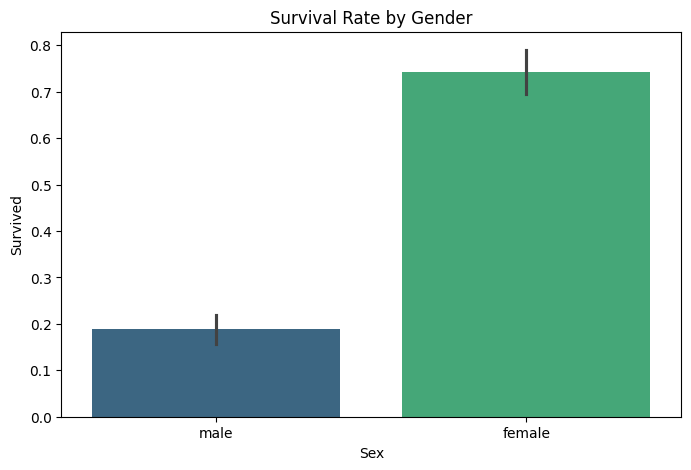

In [4]:
# Visualisasi Gender vs Survival
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Sex', y='Survived', palette='viridis')
plt.title("Survival Rate by Gender")
plt.show()

# Log hasil pembersihan sebagai Tabel Final di W&B
clean_table = wandb.Table(dataframe=df)
wandb.log({"clean_data": clean_table})

# Menutup sesi W&B
wandb.finish()